# Import necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sales-data/SalesData.csv


In [3]:
sales = pd.read_csv("/Users/ravindra/SalesData.csvSalesData.csv")

In [4]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


1. # 1. Compare Sales by region for 2016 with 2015 using bar chart

In [5]:
region_sales = sales.groupby("Region")["Sales2015","Sales2016"].sum()

In [6]:
region_sales

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


<Figure size 864x432 with 0 Axes>

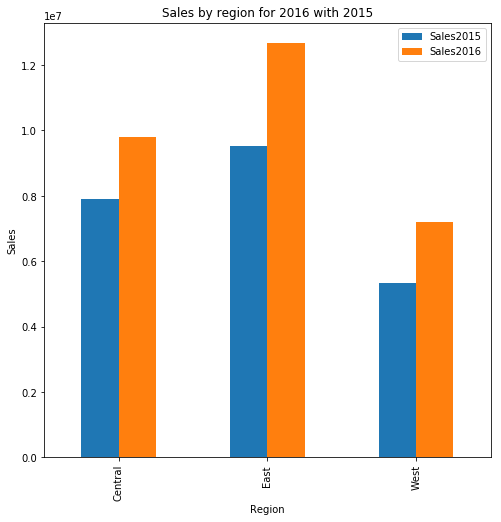

In [7]:
plt.figure(figsize=(12,6))
region_sales.plot(kind="bar",figsize=(8,8))
plt.ylabel('Sales')
plt.title("Sales by region for 2016 with 2015")
plt.show()

In [8]:
print("We can conclude that sales in 2016 is more as compared to sales in 2015 in all regions. East region has contributed the maximum.")

We can conclude that sales in 2016 is more as compared to sales in 2015 in all regions. East region has contributed the maximum.


# 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [9]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [10]:
sales_pie = sales.groupby("Region")["Sales2016"].sum()

In [11]:
sales_pie

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

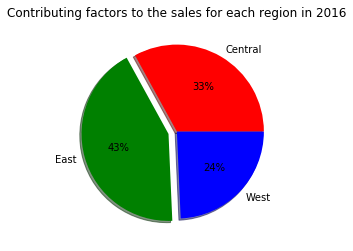

In [12]:
plt.pie(sales_pie,autopct="%1.0f%%",labels=["Central","East","West"],shadow=True,explode=[0.0,0.1,0.0],colors=['r', 'g', 'b'])
plt.title("Contributing factors to the sales for each region in 2016")
plt.show()

In [13]:
print("East region has contributed the maximum in 2016.")

East region has contributed the maximum in 2016.


# 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [14]:
sales_region_tier = sales.groupby(["Region","Tier"])['Sales2015','Sales2016'].sum()
sales_region_tier

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

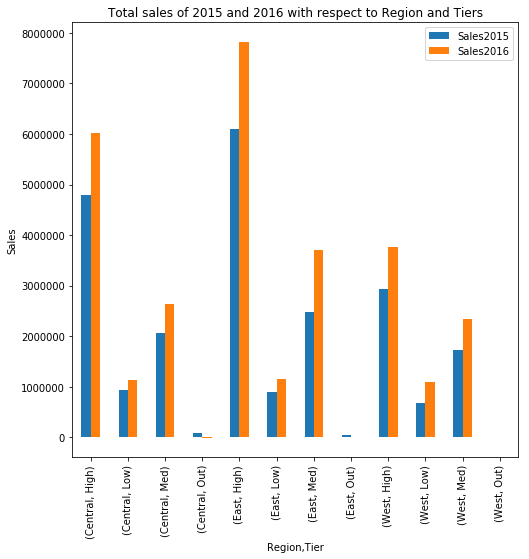

In [15]:
sales_region_tier.plot(kind="bar",figsize=(8,8))
plt.ylabel("Sales")
plt.title("Total sales of 2015 and 2016 with respect to Region and Tiers")
plt.show()

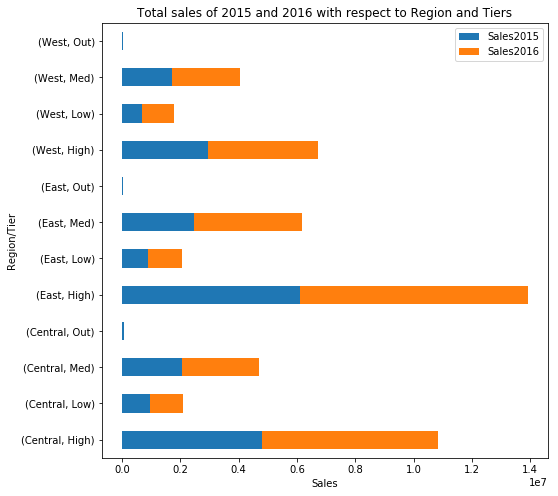

In [16]:
#stacked bar chart
sales_region_tier.plot(kind="barh",stacked=True,figsize=(8,8))
plt.xlabel("Sales")
plt.ylabel("Region/Tier")
plt.title("Total sales of 2015 and 2016 with respect to Region and Tiers")
plt.show()

In [17]:
print("We can conclude that East region and High tier in 2016 have contributed the maximum. Also sales in 2015 and sales in 2016 both is maximum in East region and High tier")

We can conclude that East region and High tier in 2016 have contributed the maximum. Also sales in 2015 and sales in 2016 both is maximum in East region and High tier


# 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [18]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [19]:
#grouping the data based on Region and State to find the total sales in 2015 and 2016
sales_state = sales.groupby(['Region',"State"])['Sales2015','Sales2016'].sum()

In [20]:
sales_state

Sales2015     Sales2016
Region  State                            
Central AL     5.091037e+05  5.958284e+05
        AR     2.133175e+05  2.276081e+05
        IL     6.217938e+05  7.843074e+05
        IN     3.166781e+05  5.996723e+05
        KY     5.312149e+05  6.332189e+05
        LA     4.793662e+05  6.803033e+05
        MI     5.686517e+05  7.072480e+05
        MS     3.045782e+05  2.204109e+05
        OH     9.276875e+05  1.221085e+06
        OK     2.484607e+05  3.396445e+05
        PA     3.002670e+05  2.877924e+05
        TN     4.370386e+05  5.522301e+05
        TX     1.712440e+06  2.013116e+06
        WI     3.044250e+05  4.403802e+05
        WV     4.167062e+05  4.849640e+05
East    CT     1.972028e+05  3.235023e+05
        DC     2.167240e+05  2.574217e+05
        FL     1.660162e+06  2.508232e+06
        GA     6.815465e+05  9.469198e+05
        MA     4.192788e+05  6.870964e+05
        MD     5.273091e+05  7.500088e+05
        ME     7.742564e+04  1.836731e+05
        NC     1.292802e+06  1.610521e+06
        NH     1.364194e+05  1.447175e+05
        NJ     5.204193e+05  7.822892e+05
        NY     1.725415e+06  1.703136e+06
        PA     7.850928e+05  8.943195e+05
        RI     1.563118e+05  1.624546e+05
        SC     2.478118e+05  4.634141e+05
        TN     4.967700e+04  7.010941e+04
        VA     8.193191e+05  1.179415e+06
West    AZ     3.889876e+05  5.195079e+05
        CA     1.891621e+06  2.396883e+06
        CO     4.023385e+05  5.046536e+05
        IA     1.022714e+05  1.461603e+05
        ID     9.237388e+04  1.157684e+05
        IL     9.375350e+04  1.224796e+05
        KS     2.284577e+05  2.850207e+05
        MN     3.142297e+05  3.220523e+05
        MO     4.444618e+05  7.241663e+05
        NE     6.981622e+04  8.587284e+04
        NM     8.828041e+04  1.325122e+05
        NV     2.057940e+05  2.814234e+05
        OR     2.629237e+05  4.383578e+05
        SD     7.549041e+04  1.662565e+05
        TX     2.530733e+05  3.495791e+05
        UT     1.133622e+05  1.732097e+05
        WA     3.225094e+05  4.457855e+05

In [21]:
#filtering out sales for East region in 2015 and 2016 
sales_east = sales_state.loc["East"]

In [22]:
sales_east

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


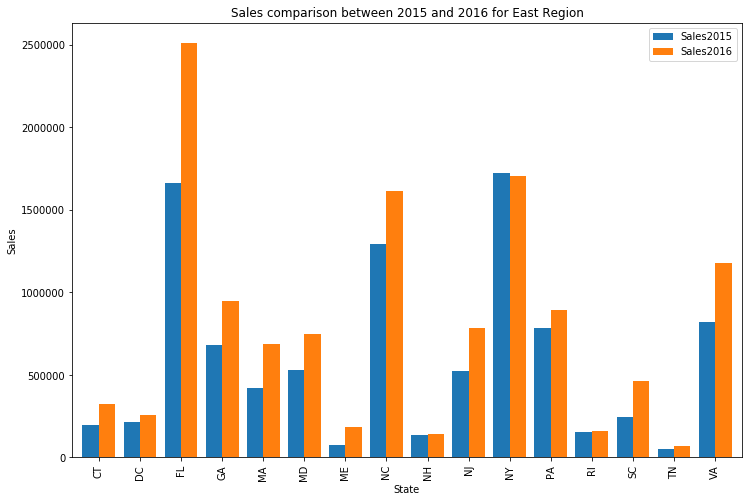

In [23]:
sales_east.plot(kind="bar",figsize=(12,8),width=0.8)
plt.ylabel("Sales")
plt.title("Sales comparison between 2015 and 2016 for East Region")
plt.show()

In [24]:
print("NY state registered a decline in sales in 2016 as compared to 2015")

NY state registered a decline in sales in 2016 as compared to 2015


# 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [25]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [26]:
#grouping the data based on tier and division to find the total sum of sales in 2015 and 2016
sales_division_tier =sales.groupby(["Tier","Division"])["Units2015","Units2016"].sum()

In [27]:
sales_division_tier

Units2015  Units2016
Tier Division                           
High BIG APPLE       180.8330   231.0000
     CHARGERS        123.6666   164.4999
     CONGRESSIONAL   164.5003   205.0000
     DIAMONDBACK     153.3334   176.6667
     EMPIRE          414.3332   449.3332
...                       ...        ...
Out  SYNERGY           3.0000     0.0000
     THE CAROLINAS     2.0000     0.0000
     VICTORY           1.0000     0.0000
     WOLVERINE         1.0000     0.0000
     WRANGLER         13.0000     0.0000

[96 rows x 2 columns]

In [28]:
high_tier = sales_division_tier.loc["High"]

In [29]:
high_tier

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


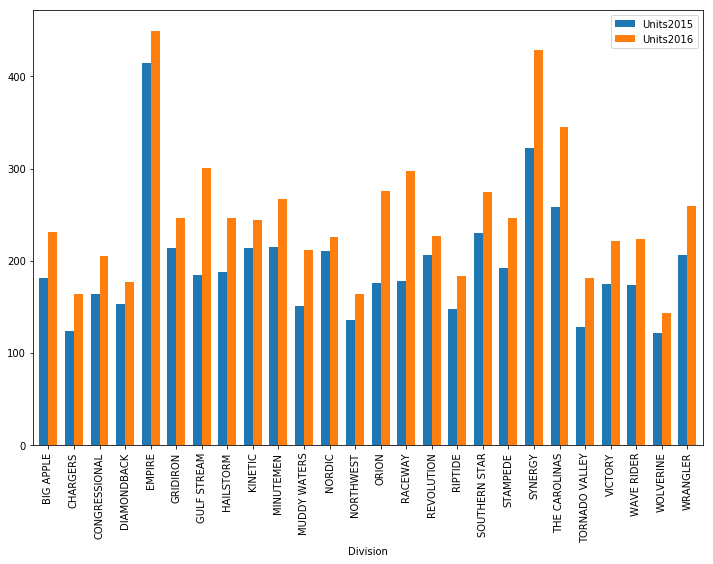

In [30]:
high_tier.plot(kind="bar",figsize=(12,8),width=0.7)

In [31]:
print("No division show decline in number of units sold in 2016 compared to 2015")

No division show decline in number of units sold in 2016 compared to 2015


# 6. Create a new column Qtr in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [32]:
sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31


In [33]:
month =sales["Month"]

In [34]:
quarter = []
for x in month :
    if x in ["Jan","Feb","Mar"]:
        quarter.append("Q1")
    elif x in ["Apr","May","Jun"]:
        quarter.append("Q2")
    elif x in ["Jul","Aug","Sep"]:
        quarter.append("Q3")
    else:
        quarter.append("Q4")

In [35]:
quarter

['Q3',
 'Q4',
 'Q2',
 'Q1',
 'Q3',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q3',
 'Q1',
 'Q1',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q2',
 'Q4',
 'Q2',
 'Q2',
 'Q4',
 'Q2',
 'Q2',
 'Q2',
 'Q4',
 'Q4',
 'Q1',
 'Q2',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q2',
 'Q4',
 'Q1',
 'Q4',
 'Q4',
 'Q4',
 'Q1',
 'Q1',
 'Q2',
 'Q2',
 'Q2',
 'Q1',
 'Q4',
 'Q3',
 'Q4',
 'Q1',
 'Q1',
 'Q3',
 'Q2',
 'Q3',
 'Q1',
 'Q2',
 'Q3',
 'Q3',
 'Q4',
 'Q3',
 'Q1',
 'Q4',
 'Q4',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q1',
 'Q3',
 'Q1',
 'Q3',
 'Q2',
 'Q1',
 'Q3',
 'Q3',
 'Q2',
 'Q4',
 'Q1',
 'Q2',
 'Q4',
 'Q2',
 'Q3',
 'Q2',
 'Q2',
 'Q4',
 'Q3',
 'Q4',
 'Q3',
 'Q2',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q4',
 'Q2',
 'Q3',
 'Q2',
 'Q4',
 'Q1',
 'Q1',
 'Q4',
 'Q1',
 'Q2',
 'Q1',
 'Q2',
 'Q4',
 'Q4',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q3',
 'Q3',
 'Q2',
 'Q4',
 'Q3',
 'Q2',
 'Q1',
 'Q4',
 'Q2',
 'Q4',
 'Q1',
 'Q3',
 'Q3',
 'Q3',
 'Q4',
 'Q4',
 'Q4',
 'Q2',
 'Q1',
 'Q4',
 'Q1',
 'Q3',
 'Q3',
 'Q1',
 'Q4',
 'Q3',
 'Q2',
 'Q1',
 'Q1',
 'Q2',

In [36]:
#create a new column "Qtr"
sales["Qtr"]= pd.Series(quarter)

In [37]:
sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4


# 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


In [38]:
#grouping data based on "Qtr" to find total sales in 2015 and 2016
qtr_sales = sales.groupby("Qtr")["Sales2015","Sales2016"].sum()

In [39]:
qtr_sales

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


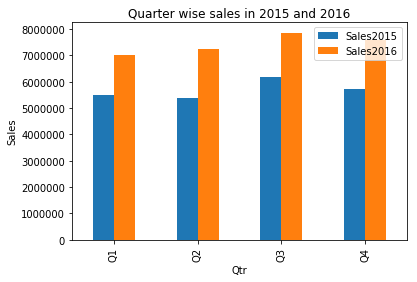

In [40]:
qtr_sales.plot(kind="bar")
plt.ylabel("Sales")
plt.title("Quarter wise sales in 2015 and 2016")
plt.show()

# 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [41]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


In [42]:
#grouping the data based on "Qtr" and "Tier" to find total sales in 2016
qtr_pivot = sales.pivot_table(index='Qtr',columns='Tier',values='Sales2016')

In [43]:
qtr_pivot

Tier,High,Low,Med,Out
Qtr,,,,
Q1,7974.677515,5516.469593,7654.041681,0.000000
Q2,8752.018136,5031.608757,8758.157542,0.000000
Q3,9334.404693,5446.422671,8197.976091,-360.947778
Q4,9386.142545,5052.104694,8307.596804,0.000000


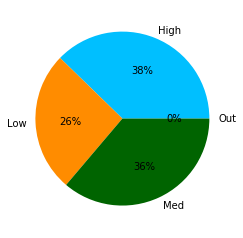

In [44]:
#Qtr Q1
plt.pie(x=qtr_pivot.loc["Q1",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['deepskyblue', 'darkorange', 'darkgreen'])
plt.show()

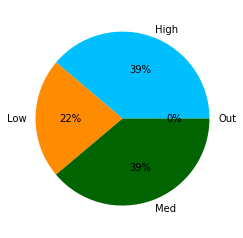

In [45]:
#Qtr Q2
plt.pie(x=qtr_pivot.loc["Q2",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['deepskyblue', 'darkorange', 'darkgreen'])
plt.show()

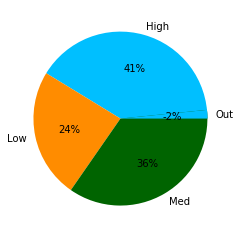

In [46]:
#Qtr Q3
plt.pie(x=qtr_pivot.loc["Q3",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['deepskyblue', 'darkorange', 'darkgreen'])
plt.show()

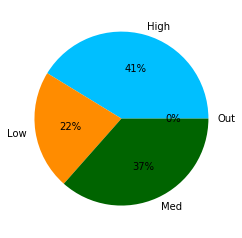

In [47]:
#Qtr Q4
plt.pie(x=qtr_pivot.loc["Q4",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['deepskyblue', 'darkorange', 'darkgreen'])
plt.show()